In [2]:
import pandas as pd
import matplotlib as plt

In [3]:
pd=pd.read_csv("House Price India.csv")



In [4]:
pd.info()
pd


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14619 entries, 0 to 14618
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14619 non-null  int64  
 1   Date                                   14619 non-null  int64  
 2   number of bedrooms                     14619 non-null  int64  
 3   number of bathrooms                    14619 non-null  float64
 4   living area                            14619 non-null  int64  
 5   lot area                               14619 non-null  int64  
 6   number of floors                       14619 non-null  float64
 7   waterfront present                     14619 non-null  int64  
 8   number of views                        14619 non-null  int64  
 9   condition of the house                 14619 non-null  int64  
 10  grade of the house                     14619 non-null  int64  
 11  Ar

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
1,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
2,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
3,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
4,6762813105,42491,3,2.50,2600,4750,1.0,0,0,4,...,1951,0,122007,52.9133,-114.590,2380,4750,1,67,790000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14614,6762830250,42734,2,1.50,1556,20000,1.0,0,0,4,...,1957,0,122066,52.6191,-114.472,2250,17286,3,76,221700
14615,6762830339,42734,3,2.00,1680,7000,1.5,0,0,4,...,1968,0,122072,52.5075,-114.393,1540,7480,3,59,219200
14616,6762830618,42734,2,1.00,1070,6120,1.0,0,0,3,...,1962,0,122056,52.7289,-114.507,1130,6120,2,64,209000
14617,6762830709,42734,4,1.00,1030,6621,1.0,0,0,4,...,1955,0,122042,52.7157,-114.411,1420,6631,3,54,205000


In [5]:
pd.isna().sum()
pd.duplicated().sum()

np.int64(0)

<Axes: xlabel='condition of the house'>

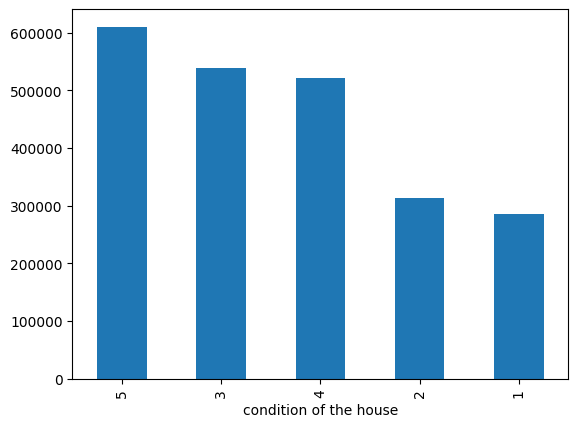

In [10]:
pd.groupby("condition of the house")["Price"].mean().sort_values(ascending=False).plot(kind="bar")

In [14]:
pd.columns

Index(['id', 'Date', 'number of bedrooms', 'number of bathrooms',
       'living area', 'lot area', 'number of floors', 'waterfront present',
       'number of views', 'condition of the house', 'grade of the house',
       'Area of the house(excluding basement)', 'Area of the basement',
       'Built Year', 'Renovation Year', 'Postal Code', 'Lattitude',
       'Longitude', 'living_area_renov', 'lot_area_renov',
       'Number of schools nearby', 'Distance from the airport', 'Price'],
      dtype='object')

In [185]:
x=pd[["number of bedrooms" , "number of bathrooms" , "living area" ,"condition of the house","grade of the house"]]
y=pd[["Price"]]

In [186]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2)
x_train,y_train

(       number of bedrooms  number of bathrooms  living area  \
 12278                   3                 2.50         3090   
 4692                    3                 3.25         1380   
 14408                   3                 1.75         1820   
 341                     3                 2.75         2015   
 3812                    4                 2.50         3000   
 ...                   ...                  ...          ...   
 7401                    4                 2.00         2360   
 14434                   4                 1.50         1430   
 8907                    3                 1.75         1270   
 12148                   3                 1.00         1210   
 12296                   3                 1.75         1900   
 
        condition of the house  grade of the house  
 12278                       3                   8  
 4692                        3                   8  
 14408                       3                   7  
 341              

In [187]:
from sklearn.model_selection import GridSearchCV

In [188]:
from sklearn.tree import DecisionTreeRegressor
param_grid={
    "criterion":["mse","friedman_mse","mae"],
    "splitter":["best","random"],
    "max_depth":[None, 10, 20, 30, 40, 50],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4]
}

In [189]:
tree_model=DecisionTreeRegressor()


In [190]:
grid_tree=GridSearchCV(estimator=tree_model, param_grid = param_grid)

In [191]:
grid_tree.fit(x_train, y_train)

C:\Users\ARCINTH\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
1080 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ARCINTH\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ARCINTH\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "C:\Users\ARCINTH\AppData\Ro

,estimator,DecisionTreeRegressor()
,param_grid,"{'criterion': ['mse', 'friedman_mse', ...], 'max_depth': [None, 10, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], ...}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'friedman_mse'


In [192]:
grid_tree.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'splitter': 'random'}

In [193]:
tree_preds=grid_tree.predict(x_test)

In [194]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, tree_preds)

148619.76936781112

In [195]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [196]:
lr.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [197]:
predslr=lr.predict(x_test)

In [198]:
mean_absolute_error(y_test, predslr)

157398.71409003064

In [199]:
from sklearn.ensemble import RandomForestRegressor
rfmodel=RandomForestRegressor()

In [200]:
param_gridrf={
    "max_depth":[5,10,15],
    "n_estimators" :[2,3,4,5,6,7,8,9,10]
}

In [201]:
gridrf=GridSearchCV(rfmodel,param_gridrf)

In [202]:
gridrf.fit(x_train , y_train.values.ravel())

,estimator,RandomForestRegressor()
,param_grid,"{'max_depth': [5, 10, ...], 'n_estimators': [2, 3, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,8


In [203]:
gridrf.best_params_

{'max_depth': 5, 'n_estimators': 8}

In [204]:
rfpredictions=gridrf.predict(x_test)

In [205]:
mean_absolute_error(y_test,rfpredictions)

145013.93936431472

In [208]:
import joblib
joblib.dump(gridrf,"HPmodel.pkl")

['HPmodel.pkl']

In [207]:
x.columns


Index(['number of bedrooms', 'number of bathrooms', 'living area',
       'condition of the house', 'grade of the house'],
      dtype='object')